In [21]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.graph_objects as go
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter
from sklearn.metrics import silhouette_samples

In [22]:
df = pd.read_csv('Ivo Py Data.csv',sep=';')

In [23]:
df.head()

,CODE STORE2,Selling In,Selling Out,Promo Selling Out,Promo Selling Out Rate,Umur Outlet (Bulan),Total Item Transaction,Total Transaction,Is_East,Average Selling In Per Transaction,Average Selling Out Per Month,Average Promo Selling Out By Period,Is Active,Jenis Freezer,Is Alfamart,No Time Transaction
0,013H,2307294,3913784,606937,0.16,36,26,3,0,769098,782757,75867,1,1,0,18
1,014H,5044074,7000001,830181,0.12,32,30,4,0,1261019,1400000,103773,1,1,0,18
2,016H,3358670,7086128,1731893,0.24,15,29,4,0,839668,1417226,216487,1,1,0,14
3,004H,6116137,6385587,1487028,0.23,45,32,5,0,1223227,1277117,185878,1,1,0,15
4,008H,6101340,8155948,1800992,0.22,45,30,6,0,1016890,1631190,225124,1,1,0,10


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2263 entries, 0 to 2262
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CODE STORE2                          2263 non-null   object 
 1   Selling In                           2263 non-null   int64  
 2   Selling Out                          2263 non-null   int64  
 3   Promo Selling Out                    2263 non-null   int64  
 4   Promo Selling Out Rate               2263 non-null   float64
 5   Umur Outlet (Bulan)                  2263 non-null   int64  
 6   Total Item Transaction               2263 non-null   int64  
 7   Total Transaction                    2263 non-null   int64  
 8   Is_East                              2263 non-null   int64  
 9   Average Selling In Per Transaction   2263 non-null   int64  
 10  Average Selling Out Per Month        2263 non-null   int64  
 11  Average Promo Selling Out By P

In [25]:
df=df.drop(columns='CODE STORE2')

In [26]:
# Define the KMeans model
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model
kmeans.fit(df)

# Get the cluster labels
df['Cluster'] = kmeans.labels_

# Show the data with cluster labels
print("Clustering Result:")
print(df.head())
print(df.tail())

Clustering Result:
   Selling In  Selling Out  Promo Selling Out  Promo Selling Out Rate  \
0     2307294      3913784             606937                    0.16   
1     5044074      7000001             830181                    0.12   
2     3358670      7086128            1731893                    0.24   
3     6116137      6385587            1487028                    0.23   
4     6101340      8155948            1800992                    0.22   

   Umur Outlet (Bulan)  Total Item Transaction  Total Transaction  Is_East  \
0                   36                      26                  3        0   
1                   32                      30                  4        0   
2                   15                      29                  4        0   
3                   45                      32                  5        0   
4                   45                      30                  6        0   

   Average Selling In Per Transaction  Average Selling Out Per Month  \
0

In [27]:
# Display the clustering results
cluster_means_transposed = df.groupby('Cluster').mean().round(0).transpose()

print(cluster_means_transposed)

Cluster                                      0          1           2  \
Selling In                           1275041.0  3659994.0   9436140.0   
Selling Out                           917100.0  4175354.0  11664544.0   
Promo Selling Out                     342148.0  1059301.0   2269329.0   
Promo Selling Out Rate                     0.0        0.0         0.0   
Umur Outlet (Bulan)                       27.0       28.0        32.0   
Total Item Transaction                     8.0       20.0        27.0   
Total Transaction                          4.0        7.0        11.0   
Is_East                                    0.0        1.0         0.0   
Average Selling In Per Transaction    448869.0   719032.0   1037938.0   
Average Selling Out Per Month         185897.0   852472.0   2376890.0   
Average Promo Selling Out By Period    42768.0   132413.0    283666.0   
Is Active                                  1.0        1.0         1.0   
Jenis Freezer                              0.0     

In [30]:
clusters = kmeans.fit_predict(df)

In [31]:
df['Cluster'] = clusters

Rata-rata Silhouette Score: 0.412

Koefisien Silhouette untuk Cluster 0:
      Silhouette_Coeff
46            0.478859
71            0.231258
72            0.484095
146           0.424273
163           0.094719
...                ...
2255          0.204102
2258          0.443975
2260          0.600030
2261          0.572850
2262          0.586387

[1034 rows x 1 columns]

Koefisien Silhouette untuk Cluster 1:
      Silhouette_Coeff
0             0.015531
5             0.076860
10            0.205402
12            0.345158
21            0.430062
...                ...
2046          0.468918
2047          0.373558
2123          0.044318
2178          0.099179
2200          0.035630

[293 rows x 1 columns]

Koefisien Silhouette untuk Cluster 2:
      Silhouette_Coeff
13            0.565282
14            0.464175
16            0.581549
17            0.059219
20            0.476645
29            0.549600
34            0.357518
40            0.409172
41            0.476886
42            0.28

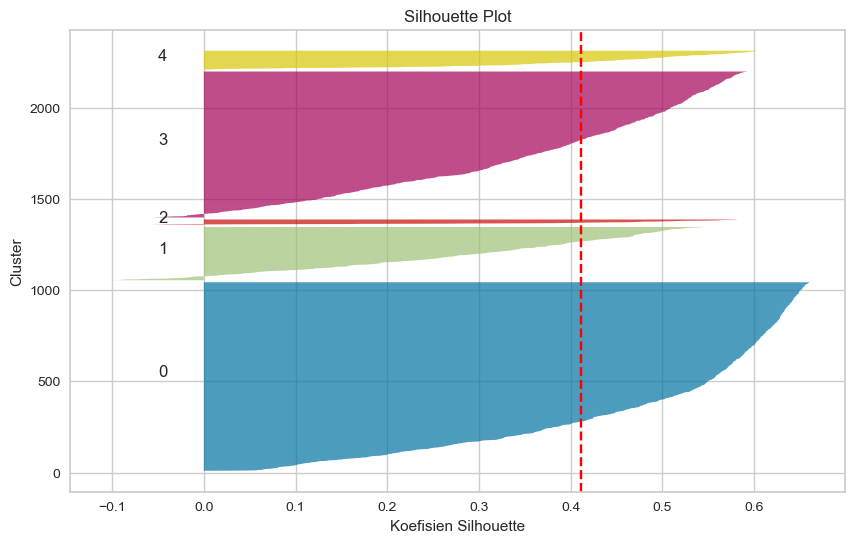

In [32]:
# Hitung koefisien silhouette untuk setiap titik
sample_silhouette_values = silhouette_samples(df, clusters)
# Tambahkan nilai koefisien silhouette ke DataFrame
df['Silhouette_Coeff'] = sample_silhouette_values
# Hitung rata-rata koefisien silhouette
average_silhouette = silhouette_score(df, clusters)
print(f"Rata-rata Silhouette Score: {average_silhouette:.3f}")
# Tampilkan koefisien silhouette untuk setiap cluster
for cluster in range(n_clusters):
    print(f"\nKoefisien Silhouette untuk Cluster {cluster}:")
    print(df[df['Cluster'] == cluster][['Silhouette_Coeff']])


In [ ]:
# Visualisasi koefisien silhouette
plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, alpha=0.7)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10  # Spasi untuk cluster berikutnya
plt.title("Silhouette Plot")
plt.xlabel("Koefisien Silhouette")
plt.ylabel("Cluster")
plt.axvline(x=average_silhouette, color="red", linestyle="--")  # Garis rata-rata
plt.show()

In [34]:
df.to_excel('df_clean.xlsx', index=False)

In [ ]:
cluster_means_transposed.to_excel('df_clean2.xlsx', index=False)